In [1]:
# importing relevant libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
"""loading the datasets from the csv files"""

current_health_expenditure = pd.read_csv('data/current_health_expenditure.csv', nrows=217)
gdp_per_capita = pd.read_csv('data/gdp_per_capita.csv', nrows=217)
infant_mortality_rate = pd.read_csv('data/infant_mortality_rate.csv', nrows=217)
female_mortailty_rate = pd.read_csv('data/female_mortality_rate.csv', nrows=217)
male_mortailty_rate = pd.read_csv('data/male_mortailty_rate.csv', nrows=217)
out_of_pocket_expenditure = pd.read_csv('data/out_of_pocket_health_expenditure.csv')
gov_health_expenditure = pd.read_csv('data/government_health_expenditure.csv')

In [4]:
current_health_expenditure

,Series Name,Series Code,Country Name,Country Code,1980 [YR1980],1981 [YR1981],1982 [YR1982],1983 [YR1983],1984 [YR1984],1985 [YR1985],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,Afghanistan,AFG,..,..,..,..,..,..,...,9.52887821,10.10534763,11.81859016,12.62081718,14.20841885,14.83131981,15.53361416,21.82794952,..,..
1,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,Albania,ALB,..,..,..,..,..,..,...,6.43451118,6.46411896,6.7293272,6.57848787,6.66844559,6.86214113,7.51920271,7.26731825,..,..
2,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,Algeria,DZA,..,..,..,..,..,..,...,6.54721403,6.96321011,6.58904791,6.53307724,6.38729763,5.86751413,6.14268684,5.5283432,..,..
3,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,American Samoa,ASM,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,Andorra,AND,..,..,..,..,..,..,...,6.77308035,6.91586447,6.90521765,7.07142639,7.37541723,7.323246,8.78673935,8.33449364,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,Virgin Islands (U.S.),VIR,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
213,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,West Bank and Gaza,PSE,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
214,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,"Yemen, Rep.",YEM,..,..,..,..,..,..,...,4.8418045,4.25285673,..,..,..,..,..,..,..,..
215,Current health expenditure (% of GDP),SH.XPD.CHEX.GD.ZS,Zambia,ZMB,..,..,..,..,..,..,...,3.82924223,4.42974281,4.46923161,4.78156233,4.76996708,6.75332499,6.31619787,6.62416458,..,..


In [5]:
"""let's transform the data frames"""

# functions to perform various transformation

def melt_columns(dataframe, value_name):
    """Returns a dataframe with years columns melted into one column"""

    new_dataframe = pd.melt(
        dataframe, 
        id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'], 
        var_name='Year', 
        value_name=value_name
    )

    new_dataframe['Year'] = new_dataframe['Year'].str.extract(r'(\d{4})')

    return new_dataframe


def drop_columns(dataframe):
    """Returns a new dataframe without unnecessary"""

    new_dataframe = dataframe.drop(columns=['Series Name', "Series Code", "Country Code"])

    return new_dataframe

def convert_data_type(dataframe, column_name):
    """Return new data frame with converted data type"""

    dataframe[column_name] = pd.to_numeric(dataframe[column_name], errors='coerce')

    return dataframe


In [6]:
# using the transformation functions

# ========================= current health exp =========================
current_health_expenditure = melt_columns(current_health_expenditure, "Current Expenditure")
current_health_expenditure = drop_columns(current_health_expenditure)
current_health_expenditure = convert_data_type(current_health_expenditure, "Current Expenditure")

# ===================== GDP per capita ==========================
gdp_per_capita = melt_columns(gdp_per_capita, 'GDP per Capita')
gdp_per_capita = drop_columns(gdp_per_capita)
gdp_per_capita = convert_data_type(gdp_per_capita, 'GDP per Capita')

# ========================== infant mortality ========================
infant_mortality_rate = melt_columns(infant_mortality_rate, 'Infant Mortality Rate')
infant_mortality_rate = drop_columns(infant_mortality_rate)
infant_mortality_rate = convert_data_type(infant_mortality_rate, 'Infant Mortality Rate')

# ========================== female mortality ========================
female_mortailty_rate = melt_columns(female_mortailty_rate, 'Female Mortality Rate')
female_mortailty_rate = drop_columns(female_mortailty_rate)
female_mortailty_rate = convert_data_type(female_mortailty_rate, 'Female Mortality Rate')

# ============================= male mortality ==============================
male_mortailty_rate = melt_columns(male_mortailty_rate, 'Male Mortality Rate')
male_mortailty_rate = drop_columns(male_mortailty_rate)
male_mortailty_rate = convert_data_type(male_mortailty_rate, 'Male Mortality Rate')

# ========================== out of the pocket exp ========================
out_of_pocket_expenditure = melt_columns(out_of_pocket_expenditure, 'Out Of Pocket Expenditure')
out_of_pocket_expenditure = drop_columns(out_of_pocket_expenditure)
out_of_pocket_expenditure = convert_data_type(out_of_pocket_expenditure, 'Out Of Pocket Expenditure')

# ============================= Gov health exp =============================
gov_health_expenditure = melt_columns(gov_health_expenditure, 'Gov Health Expenditure')
gov_health_expenditure = drop_columns(gov_health_expenditure)
gov_health_expenditure = convert_data_type(gov_health_expenditure, 'Gov Health Expenditure')

current_health_expenditure

,Country Name,Year,Current Expenditure
0,Afghanistan,1980,NaN
1,Albania,1980,NaN
2,Algeria,1980,NaN
3,American Samoa,1980,NaN
4,Andorra,1980,NaN
...,...,...,...
9543,Virgin Islands (U.S.),2023,NaN
9544,West Bank and Gaza,2023,NaN
9545,"Yemen, Rep.",2023,NaN
9546,Zambia,2023,NaN


In [7]:
"""let's create mortality data frame"""

# merging female and male data frame
adult_mortality = female_mortailty_rate.merge(male_mortailty_rate, on=['Country Name', 'Year'])

# merging adult mortality with infant mortality
mortality_data = adult_mortality.merge(infant_mortality_rate, on=['Country Name', 'Year'])

# dropping missing values
mortality_data = mortality_data.dropna()

mortality_data

,Country Name,Year,Female Mortality Rate,Male Mortality Rate,Infant Mortality Rate
0,Afghanistan,1980,456.101,575.356,164.0
1,Albania,1980,86.186,138.768,66.0
2,Algeria,1980,295.197,357.691,103.5
5,Angola,1980,380.987,521.651,141.8
6,Antigua and Barbuda,1980,112.289,179.298,12.5
...,...,...,...,...,...
8674,Viet Nam,2022,73.932,181.797,16.2
8676,West Bank and Gaza,2022,88.008,142.898,12.3
8677,"Yemen, Rep.",2022,171.078,296.054,33.1
8678,Zambia,2022,242.378,359.558,39.0


In [8]:
"""let's create expenditure data frame"""

# merging current health expenditure with out of the pocket expenditure
health_expenditure_data = current_health_expenditure.merge(out_of_pocket_expenditure, on=['Country Name', 'Year'])

# merging health expenditure expenditure
health_expenditure_data = health_expenditure_data.merge(gov_health_expenditure, on=['Country Name', 'Year'])

health_expenditure_data = health_expenditure_data.dropna().reset_index()

health_expenditure_data = health_expenditure_data.drop(columns=['index'])

health_expenditure_data

,Country Name,Year,Current Expenditure,Out Of Pocket Expenditure,Gov Health Expenditure
0,Albania,2000,5.944198,51.814335,2.765831
1,Algeria,2000,3.489033,25.794514,2.510828
2,Andorra,2000,5.952764,15.401141,3.900492
3,Angola,2000,1.908599,27.304688,1.110987
4,Antigua and Barbuda,2000,4.715426,22.224281,2.727691
...,...,...,...,...,...
4092,Georgia,2022,7.370000,40.450000,3.110000
4093,"Korea, Rep.",2022,9.720480,28.047964,5.972773
4094,Luxembourg,2022,5.460000,8.840000,4.740000
4095,Norway,2022,8.140000,14.080000,6.980000


In [9]:
"""let's work on the GDP per capita data"""
gdp_per_capita = gdp_per_capita.dropna()

gdp_per_capita

,Country Name,Year,GDP per Capita
1,Albania,1990,-11.187905
2,Algeria,1990,-1.682928
4,Andorra,1990,0.042321
5,Angola,1990,-6.626409
6,Antigua and Barbuda,1990,3.512321
...,...,...,...
2596,Vanuatu,2023,-0.160067
2598,Viet Nam,2023,4.332271
2600,West Bank and Gaza,2023,-7.743373
2602,Zambia,2023,2.992084


In [11]:
# Convert Year column to string for consistency during merging
mortality_data['Year'] = mortality_data['Year'].astype(str)
health_expenditure_data['Year'] = health_expenditure_data['Year'].astype(str)
gdp_per_capita['Year'] = gdp_per_capita['Year'].astype(str)

In [12]:
merged_df = pd.merge(mortality_data, health_expenditure_data, on=['Country Name', 'Year'], how='inner')

# Merge with gdp_per_capita
merged_df = pd.merge(merged_df, gdp_per_capita, on=['Country Name', 'Year'], how='inner')

# Check the merged DataFrame
merged_df

,Country Name,Year,Female Mortality Rate,Male Mortality Rate,Infant Mortality Rate,Current Expenditure,Out Of Pocket Expenditure,Gov Health Expenditure,GDP per Capita
0,Albania,2000,58.575,110.606,24.0,5.944198,51.814335,2.765831,7.630022
1,Algeria,2000,122.518,159.175,35.6,3.489033,25.794514,2.510828,2.354580
2,Angola,2000,360.010,469.150,120.7,1.908599,27.304688,1.110987,-0.234946
3,Antigua and Barbuda,2000,94.431,160.223,12.2,4.715426,22.224281,2.727691,4.457371
4,Argentina,2000,102.208,176.243,17.3,8.220011,29.104332,4.498951,-1.906987
...,...,...,...,...,...,...,...,...,...
1586,Georgia,2022,85.587,253.884,8.3,7.370000,40.450000,3.110000,10.842209
1587,"Korea, Rep.",2022,21.661,57.323,2.4,9.720480,28.047964,5.972773,2.805238
1588,Luxembourg,2022,33.992,63.347,2.2,5.460000,8.840000,4.740000,-0.643838
1589,Norway,2022,38.293,61.947,1.8,8.140000,14.080000,6.980000,2.084382


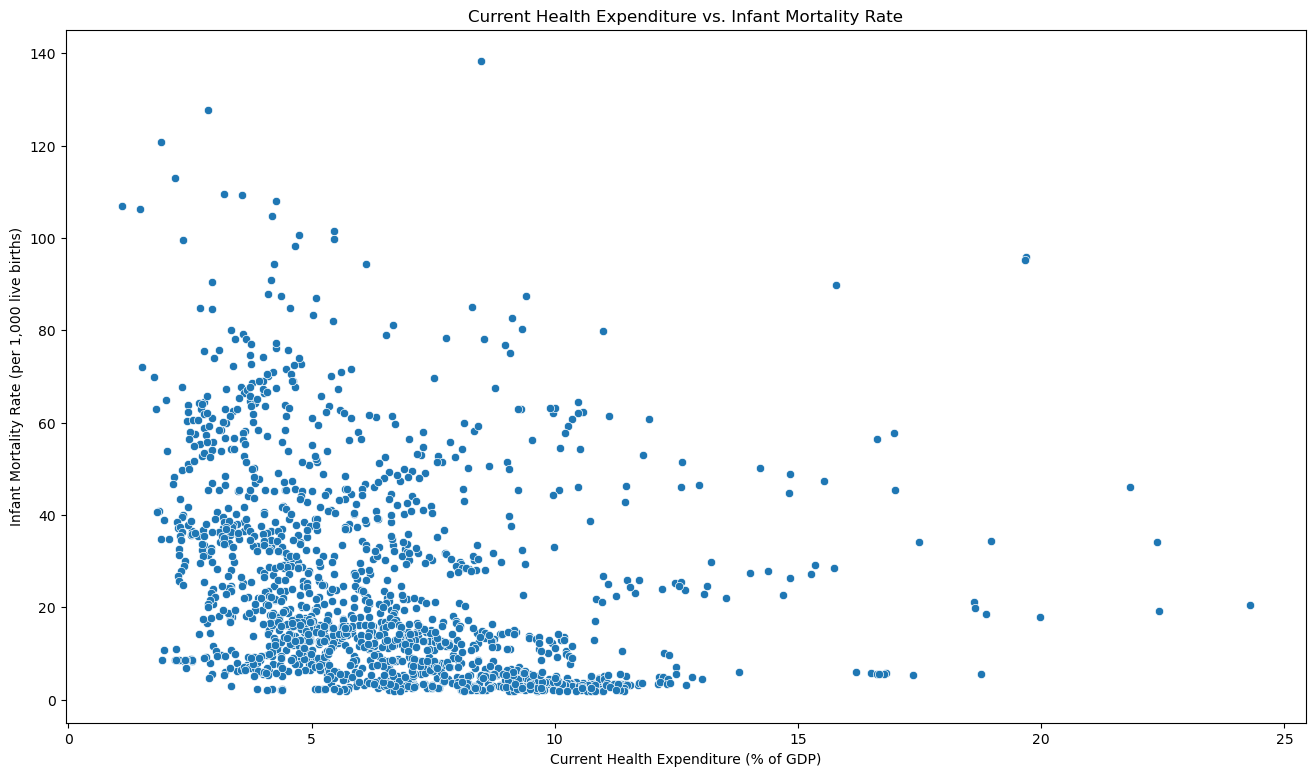

In [14]:
# Scatter plots for Healthcare Expenditure vs. Health Outcomes
plt.figure(figsize=(16, 9))
sns.scatterplot(data=merged_df, x='Current Expenditure', y='Infant Mortality Rate')
plt.title('Current Health Expenditure vs. Infant Mortality Rate')
plt.xlabel('Current Health Expenditure (% of GDP)')
plt.ylabel('Infant Mortality Rate (per 1,000 live births)')
plt.show()

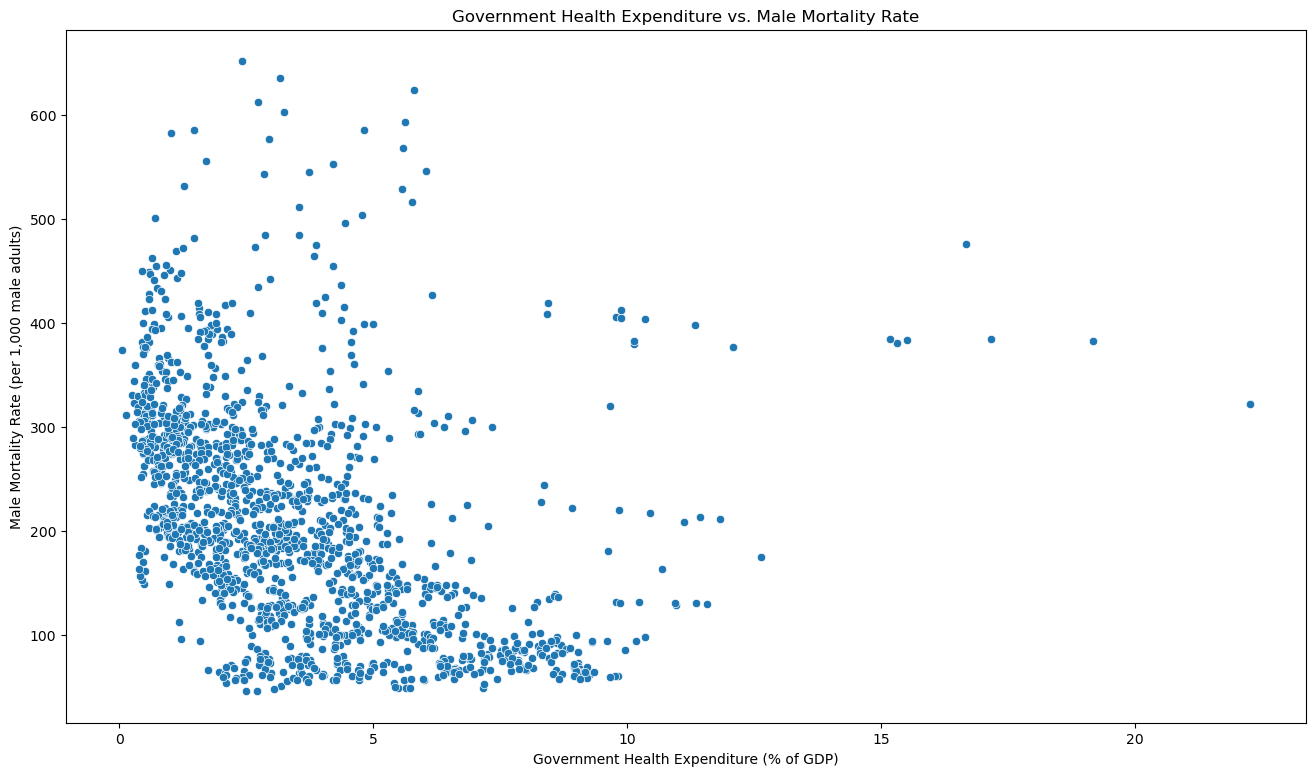

In [15]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=merged_df, x='Gov Health Expenditure', y='Male Mortality Rate')
plt.title('Government Health Expenditure vs. Male Mortality Rate')
plt.xlabel('Government Health Expenditure (% of GDP)')
plt.ylabel('Male Mortality Rate (per 1,000 male adults)')
plt.show()


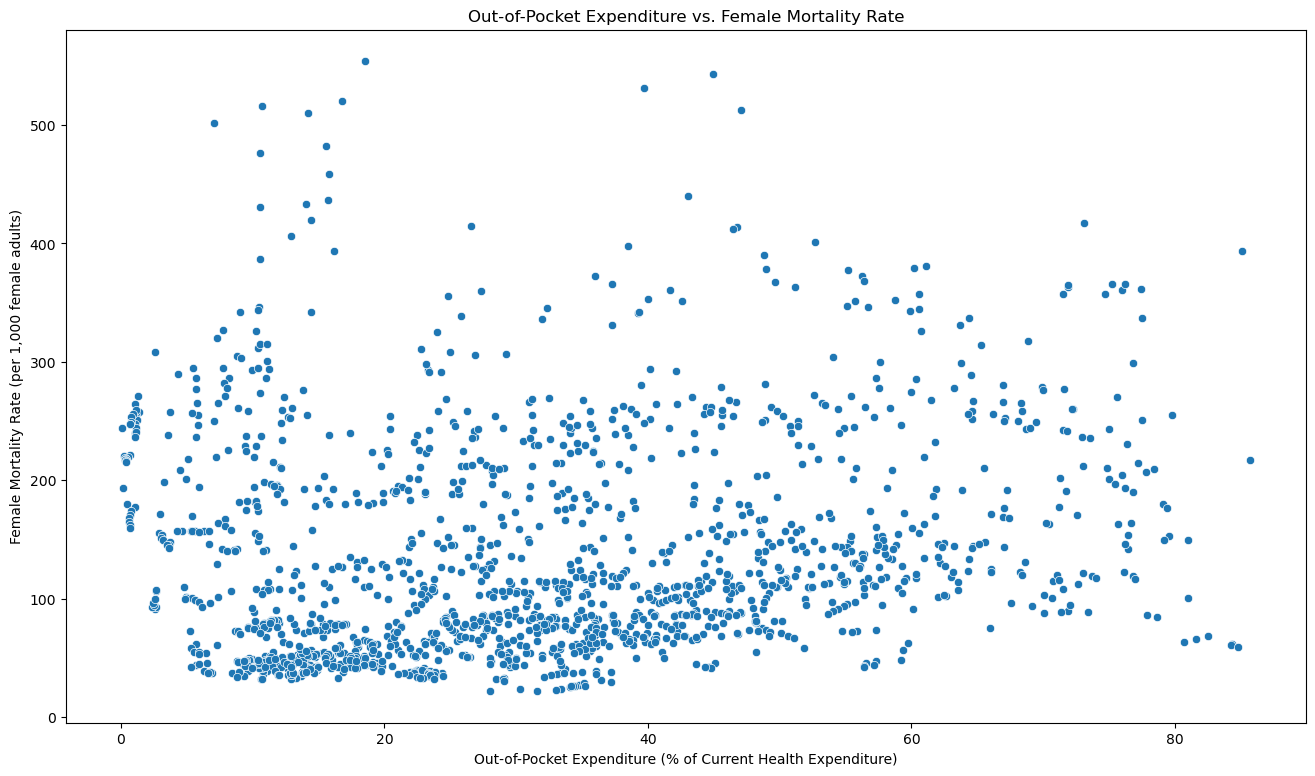

In [16]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=merged_df, x='Out Of Pocket Expenditure', y='Female Mortality Rate')
plt.title('Out-of-Pocket Expenditure vs. Female Mortality Rate')
plt.xlabel('Out-of-Pocket Expenditure (% of Current Health Expenditure)')
plt.ylabel('Female Mortality Rate (per 1,000 female adults)')
plt.show()


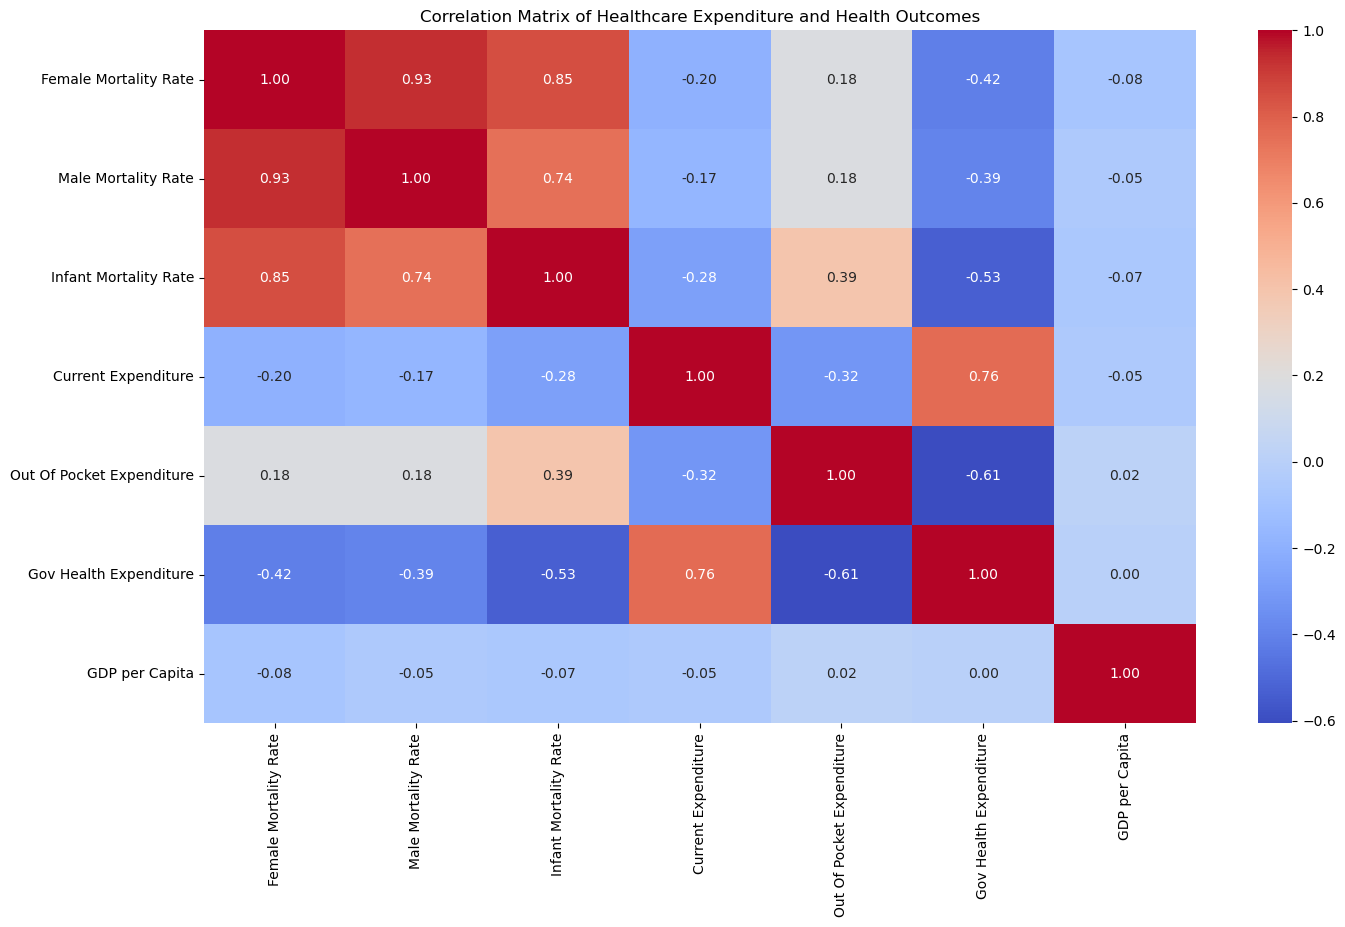

In [17]:
numeric_df = merged_df.drop(columns=['Country Name', 'Year'])

# Plot the correlation heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Healthcare Expenditure and Health Outcomes')
plt.show()
